In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial.transform import Rotation

In [2]:
work_dir = Path(r"D:\Work\2023\three_gorge\purepitch")
sima_path = work_dir/".."/"suyu_freedecay_data.csv"
cfd_path = work_dir/"RB_DATA.dat"

In [3]:
sima_data_df = pd.read_csv(sima_path)
sima_data_df.head()

,Time [s],heave [m],roll [deg],pitch [deg]
0,0.0,3.682258,4.979211,4.809143
1,0.1,3.679563,4.976808,4.807217
2,0.2,3.668353,4.969272,4.802440
3,0.3,3.648300,4.956541,4.794720
4,0.4,3.619188,4.938879,4.784087


In [ ]:
def load_cfd_data(data_file):
    cfd_data_df = pd.read_csv(data_file, sep="\s+",engine='python')
    cfd_data_df = cfd_data_df.iloc[0::3,:]
    # Get rid of spaces in the columns
    cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")   

In [4]:
cfd_data_df = pd.read_csv(cfd_path, sep="\s+",engine='python')
cfd_data_df = cfd_data_df.iloc[0::3,:]
# Get rid of spaces in the columns
cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")
cfd_data_df.columns

Index(['Time', 'CORx', 'CORy', 'CORz', 'COMx', 'COMy', 'COMz', 'Rxx', 'Rxy',
       'Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz', 'vx', 'vy', 'vz', 'wx',
       'wy', 'wz'],
      dtype='object')

In [6]:
cfd_data_df.to_csv(work_dir/"cfd_pitch_coarse_mesh.csv")

In [7]:
def get_euler_angles(df):
    orientation = df[['Rxx', 'Rxy','Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz']].values
    R = np.reshape(orientation, (3, 3))
    roll = np.arctan2(R[2, 1], R[2, 2])
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    yaw = np.arctan2(R[1, 0], R[0, 0])
    roll_degrees = np.degrees(roll)
    pitch_degrees = np.degrees(pitch)+5
    yaw_degrees = np.degrees(yaw)
    return roll_degrees, pitch_degrees, yaw_degrees

In [8]:
cfd_data_df[['Roll', 'Pitch', 'Yaw']] = cfd_data_df.apply(get_euler_angles, axis=1, result_type='expand')

In [9]:
cfd_data_df['Pitch'] = cfd_data_df["Pitch"]-cfd_data_df["Pitch"].mean()

In [10]:
cfd_data_df.tail()

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,Rzz,vx,vy,vz,wx,wy,wz,Roll,Pitch,Yaw
199905,199.977,43.87862,0,-1.138963,43.87862,0,-1.138963,0.768800,0.634940,-0.076141,...,0.995256,0,0,0,0.000003,0.000109,-0.007126,0.090063,-0.164017,-39.424348
199908,199.983,43.87862,0,-1.138963,43.87862,0,-1.138963,0.768775,0.634971,-0.076138,...,0.995256,0,0,0,0.000004,0.000110,-0.007126,0.090041,-0.163989,-39.426685
199911,199.989,43.87862,0,-1.138963,43.87862,0,-1.138963,0.768749,0.635003,-0.076134,...,0.995256,0,0,0,0.000004,0.000111,-0.007126,0.090018,-0.163960,-39.429023
199914,199.994,43.87862,0,-1.138963,43.87862,0,-1.138963,0.768723,0.635035,-0.076131,...,0.995256,0,0,0,0.000005,0.000113,-0.007126,0.089996,-0.163930,-39.431360
199917,200.000,43.87862,0,-1.138963,43.87862,0,-1.138963,0.768697,0.635066,-0.076128,...,0.995256,0,0,0,0.000006,0.000114,-0.007126,0.089974,-0.163901,-39.433698


In [15]:
cfd_data_df.to_csv(work_dir/"cfd_pitch.csv")

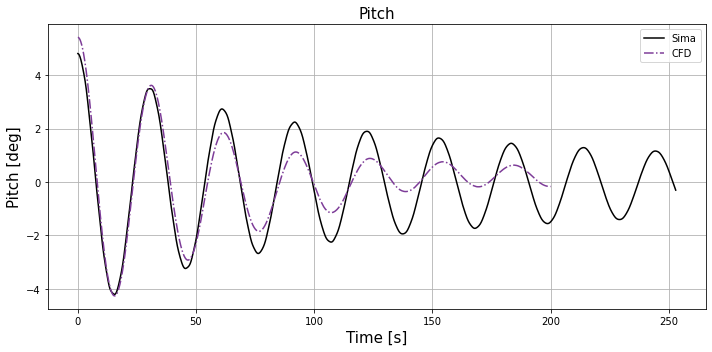

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sima_data_df["Time [s]"],sima_data_df["pitch [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['Pitch'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Pitch [deg]", fontsize=15)
ax.set_title("Pitch", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"pitch_coarse_mesh.jpg", bbox_inches="tight", dpi=400)

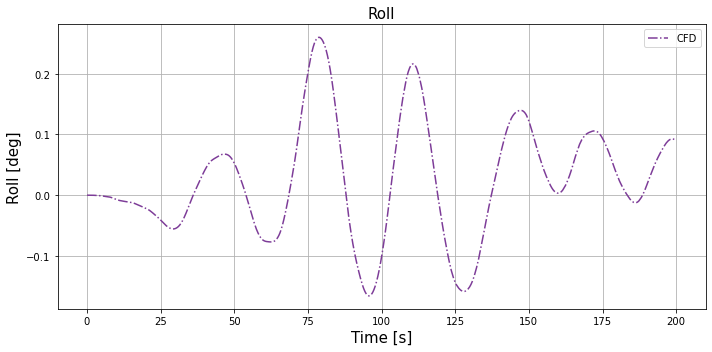

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Roll'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Roll [deg]", fontsize=15)
ax.set_title("Roll", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Roll.jpg", bbox_inches="tight", dpi=400)

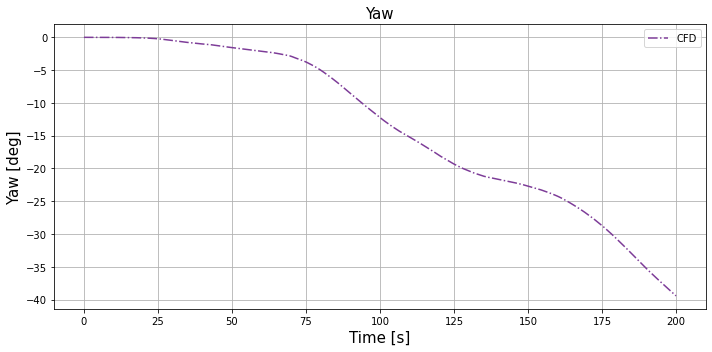

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Yaw'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Yaw [deg]", fontsize=15)
ax.set_title("Yaw", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Yaw.jpg", bbox_inches="tight", dpi=400)